In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [96]:
# 生成模拟训练数据
def train_data(m, noise):
    np.random.seed(20180824)
    x = np.linspace(-7, 7, m).reshape(m, 1)
    y = np.sin(x) + np.random.randn(m, 1)*noise
    return x, y

# 生成单位系数的多项式
def X_poly(x, n):
    tx = x
    X = np.zeros((m, n+1))
    for i in range(n+1):
        X[:,i] = tx.reshape(m)
        tx = tx*x
    return X

# 训练和作图
def mplot(ax, alg, X, y):
    _ = alg.fit(X, y)
    _ = ax.plot(x, np.dot(X, alg.coef_.reshape(n+1, 1)), 'r')
    _ = ax.plot(x, np.sin(x), 'g--')
    _ = ax.scatter(x, y, s=5, color='y', alpha=0.7)

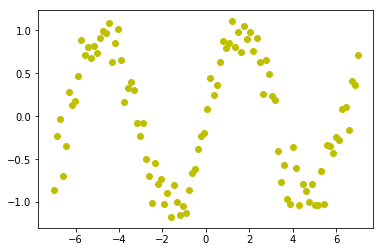

In [97]:
m = 100
noise = 0.2
x, y = train_data(m, noise)
_ = plt.scatter(x, y, color='y')

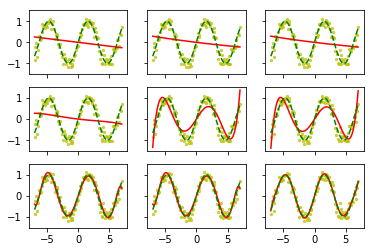

In [120]:
alg = linear_model.LinearRegression(normalize=True)
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(9):
    n = i
    X = X_poly(x, n)
    mplot(ax[i], alg, X, y)

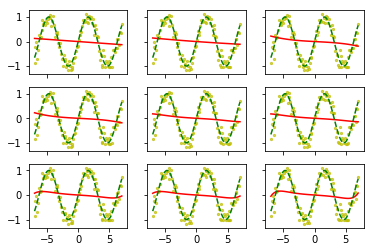

In [121]:
alg = linear_model.Ridge(normalize=True)
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(9):
    n = i
    X = X_poly(x, n)
    mplot(ax[i], alg, X, y)

C:\Users\phart\Anaconda3\envs\mytf\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


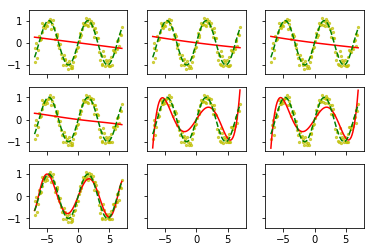

In [122]:
alg = linear_model.Lasso(alpha=0.0001, max_iter=10000, normalize=True)
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(7):
    n = i
    X = X_poly(x, n)
    mplot(ax[i], alg, X, y)